In [2]:
import numpy as np
from scipy import *
from pylab import *
import os
import pickle

%matplotlib inline

In [3]:
folder_HMF = '/pscratch/sd/j/jialiu/CAMELS/Rockstar/' ### original, unorganized halo catalogue from rockstar
home = '/global/homes/j/jialiu/cosmo_dep_feedback/'

In [4]:
### fixed parameters: 
Omega_b = 0.049
h = 0.6711
ns = 0.9624
w = -1
mnu = 0.0 #eV
Omega_k = 0.0

In [5]:
test_fn = '/global/homes/j/jialiu/cosmo_dep_feedback/CAMELS/Rockstar/Astrid/1P/1P_0/hlists/hlist_1.00000.list'
hmf = np.loadtxt(test_fn, usecols=[1, 10, 11, 12, 17, 18, 19, 26, 47])
# id(1), Mvir(10), Rvir(11), rs(12), x(17) y(18) z(19), Spin(26),c_to_a(47)

In [33]:
labels=[r'$\Omega_m$', r'$\sigma_8$', '$log_{10}(A_1)$', '$log_{10}(A_2)$', '$log_{10}(A_3)$', '$log_{10}(A_4)$']

#scale(0) id(1) desc_scale(2) desc_id(3) num_prog(4) pid(5) upid(6) desc_pid(7) phantom(8) sam_Mvir(9) Mvir(10) 
# Rvir(11) rs(12) vrms(13) mmp?(14) scale_of_last_MM(15) vmax(16) x(17) y(18) z(19) vx(20) vy(21) 
# vz(22) Jx(23) Jy(24) Jz(25) Spin(26) Breadth_first_ID(27) Depth_first_ID(28) Tree_root_ID(29) Orig_halo_ID(30) 
# Snap_idx(31) Next_coprogenitor_depthfirst_ID(32) Last_progenitor_depthfirst_ID(33) Last_mainleaf_depthfirst_ID(34) 
# Tidal_Force(35) Tidal_ID(36) Rs_Klypin(37) Mvir_all(38) M200b(39) M200c(40) M500c(41) M2500c(42) Xoff(43) Voff(44) 
# Spin_Bullock(45) b_to_a(46) c_to_a(47) A[x](48) A[y](49) A[z](50) b_to_a(500c)(51) c_to_a(500c)(52) A[x](500c)(53) 
# A[y](500c)(54) A[z](500c)(55) T/|U|(56) M_pe_Behroozi(57) M_pe_Diemer(58) Type(59) SM(60) Gas(61) BH_Mass(62) Macc(63) 
# Mpeak(64) Vacc(65) Vpeak(66) Halfmass_Scale(67) Acc_Rate_Inst(68) Acc_Rate_100Myr(69) Acc_Rate_1*Tdyn(70) Acc_Rate_2*Tdyn(71) 
# Acc_Rate_Mpeak(72) Acc_Log_Vmax_Inst(73) Acc_Log_Vmax_1*Tdyn(74) Mpeak_Scale(75) Acc_Scale(76) First_Acc_Scale(77) 
# First_Acc_Mvir(78) First_Acc_Vmax(79) Vmax\@Mpeak(80) Tidal_Force_Tdyn(81) Log_(Vmax/Vmax_max(Tdyn;Tmpeak))(82) 
# Time_to_future_merger(83) Future_merger_MMP_ID(84)

### organize the files
def organize_HMF (iz, isim, iPk='Pk_m'):
    '''For each halo cat, return both the Mass-binned HMF, as well as abundance matched halos; check for hydro if only CDM particles are used..?'''
    
    sim_name = np.loadtxt(home+'params/CosmoAstroSeed_%s.txt'%(isim), usecols=(0), dtype='U') ## the simulation names, e.g. "1P_1_n5"
    sim_params = np.loadtxt(home+'params/CosmoAstroSeed_%s.txt'%(isim), usecols=range(1,7)) ## the actual parameters, corresponding to the sim names above
    #### change all the baryon parameters to log
    sim_params = concatenate([sim_params[:,:2], log10(sim_params[:,2:])],axis=1)
    
    #### load all the Pk in next line, takes long time
    
    Pk_arr = array([np.loadtxt(folder_Pk+'%s/%s/%s/%s_z=%.2f.txt'%(isim, iLH[:2], iLH, iPk, iz))[:Nk] for iLH in sim_name])
    if iPk=='Pk_m': ## no Pk_c/b/g for _DM runs, so we only process _DM once here, when we process Pk_m
        Pk_DM_arr = array([np.loadtxt(folder_Pk+'%s_DM/%s/%s/%s_z=%.2f.txt'%(isim, iLH[:2], iLH, iPk, iz))[:Nk] for iLH in sim_name])
    
    for iset in ('LH', '1P', 'CV'): ##('1P', ): ##
        idx = where(np.char.find(sim_name, iset)!=-1)
        ifn=home+'Pk/%s_%s_%s_z=%.2f.npy'%(isim, iPk, iset, iz)
        data_arr = concatenate([sim_params[idx], Pk_arr[idx][:,:,1]],axis=1) ## include params and Pk
        save(ifn, data_arr)
        if iPk=='Pk_m': 
            ifn_DM=home+'Pk/%s_%s_%s_z=%.2f_DM.npy'%(isim, iPk, iset, iz)
            data_DM_arr = concatenate([sim_params[idx], Pk_DM_arr[idx][:,:,1]],axis=1) ## include params and Pk
            save(ifn_DM, data_DM_arr)
        
        print ('%s, %s set has %i models, data shape %s'%(isim, iset, len(idx), data_arr.shape))

118


In [38]:
######## all CAMELS sims
sim_arr = ['IllustrisTNG',  'SIMBA']  #, 'Astrid'] ## seems like Astrid files are there, but naming system is different

######### the redshift we're interested in
zarr=[0.00, 1.05, 2.00, 3.00] #, 0.05, 0.10, 0.15] #

####### organize the files, take long #########
# for isim in sim_arr:
#     for iz in zarr:
#         print (isim, iz)
#         organize_Pk (iz, isim, iPk='Pk_m')
#         organize_Pk (iz, isim, iPk='Pk_g')
#         organize_Pk (iz, isim, iPk='Pk_c')


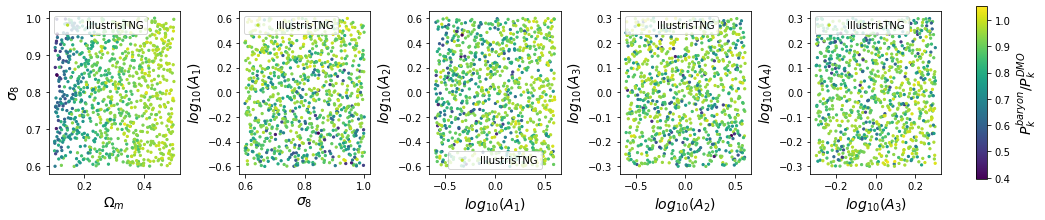

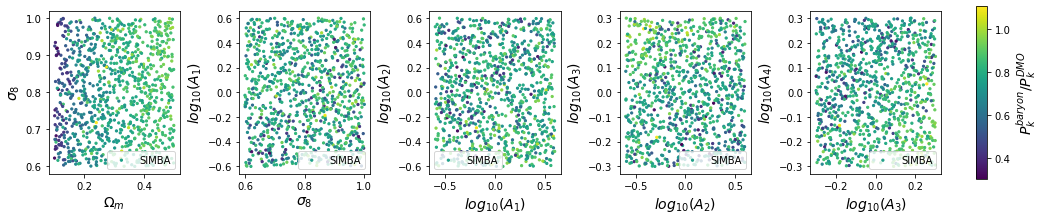

In [39]:
########### validate the tests
iPk = 'Pk_m'
iz = 0
iset = 'LH'
isim = 'IllustrisTNG'

for isim in sim_arr:
    ifn = home+'Pk/%s_%s_%s_z=%.2f.npy'%(isim, iPk, iset, iz)
    ifn_DM=home+'Pk/%s_%s_%s_z=%.2f_DM.npy'%(isim, 'Pk_m', iset, iz)
    Pk_arr = np.load(ifn)
    Pk_DM_arr = np.load(ifn_DM)
    Pk_arr.shape

    params = Pk_arr[:, :6]
    r = Pk_arr[:, 6:]/Pk_DM_arr[:, 6:]
    rprox = mean(r[:, 5:20],axis=1)
    # params.shape, r.shape, rprox.shape

    f, ax=subplots(1,5, figsize=(16,3))

    for i in range(5):
        im=ax[i].scatter(params.T[i], params.T[i+1], c=rprox, label=isim, s=5)
        ax[i].set_xlabel(labels[i], fontsize=14)
        ax[i].set_ylabel(labels[i+1],fontsize=14)   
        ax[i].legend()
    cbar_ax = f.add_axes([0.93, 0.1, 0.01, 0.8])
    f.colorbar(im, cax=cbar_ax)
    f.subplots_adjust(wspace=0.45)
    cbar_ax.set_ylabel(r'$P_k^{baryon}/P_k^{DMO}$',fontsize=14)
    show()

In [87]:
k[5:20]

array([1.6191547 , 1.87068667, 2.12329004, 2.37814498, 2.63048993,
       2.87865316, 3.13114437, 3.38815958, 3.63874185, 3.88831591,
       4.13905216, 4.39030578, 4.64217234, 4.89467867, 5.14726905])